In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('responses.csv')

# Detekcija autlajera

#### Primer koji koristimo su rezultati anketiranja mladih ljudi https://www.kaggle.com/datasets/miroslavsabo/young-people-survey iz Slovačke 2013. godine.
#### Fokusiraćemo sa na tri atributa: Age, Height i Weight.
#### Prikazaćemo različite načine za detekciju autlajera.

In [5]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


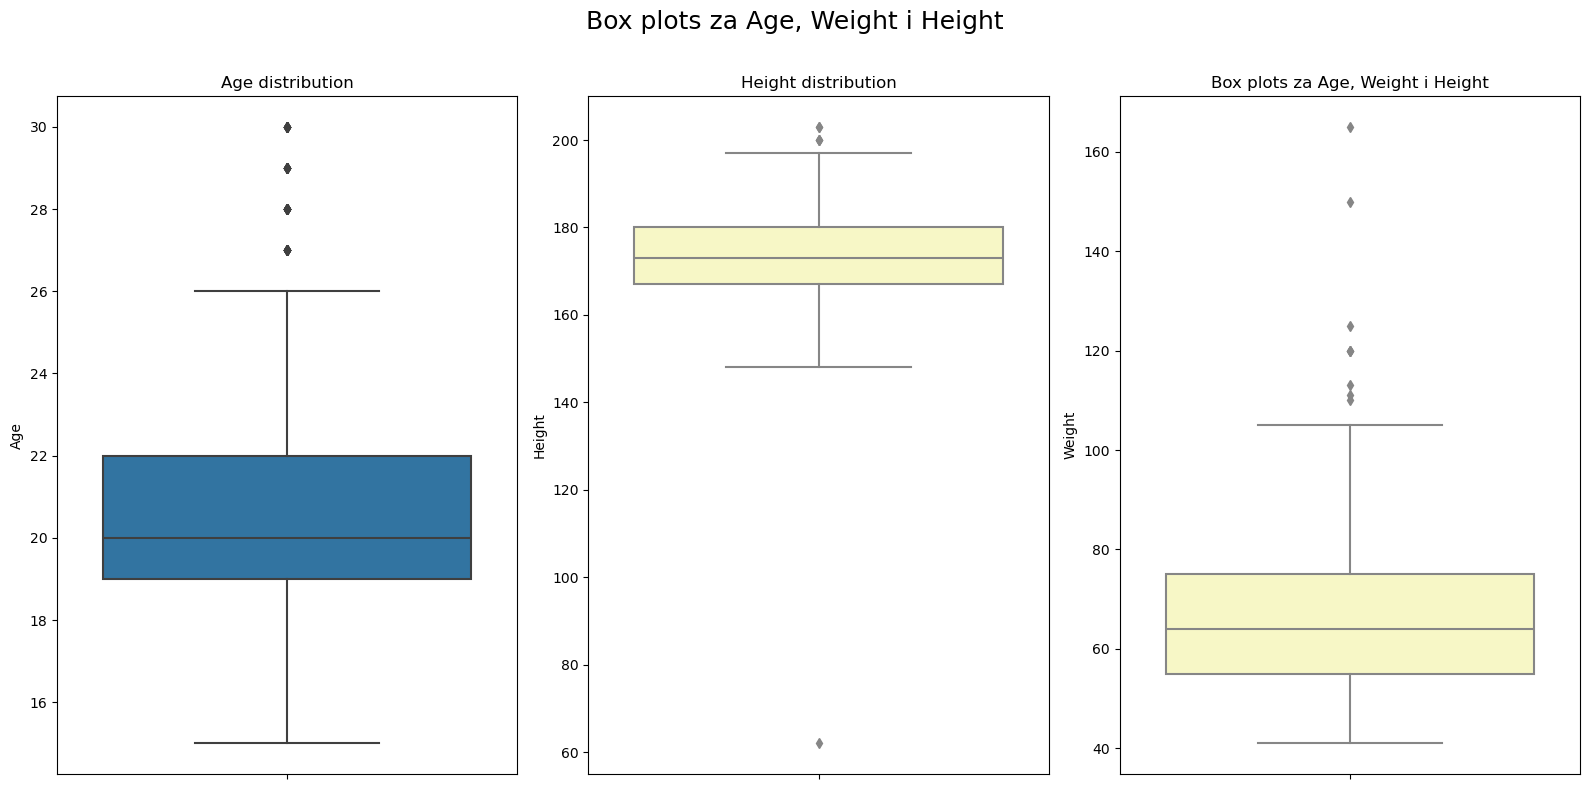

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Box plots za Age, Weight i Height\n', size = 18)

sns.boxplot(ax=axes[0], data=df, y='Age')
axes[0].set_title("Age distribution");

sns.boxplot(ax=axes[1], data=df, y='Height', palette='Spectral')
axes[1].set_title("Height distribution");

sns.boxplot(ax=axes[2], data=df, y='Weight', palette='Spectral')
axes[2].set_title("Box plots za Age, Weight i Height");

plt.tight_layout()

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


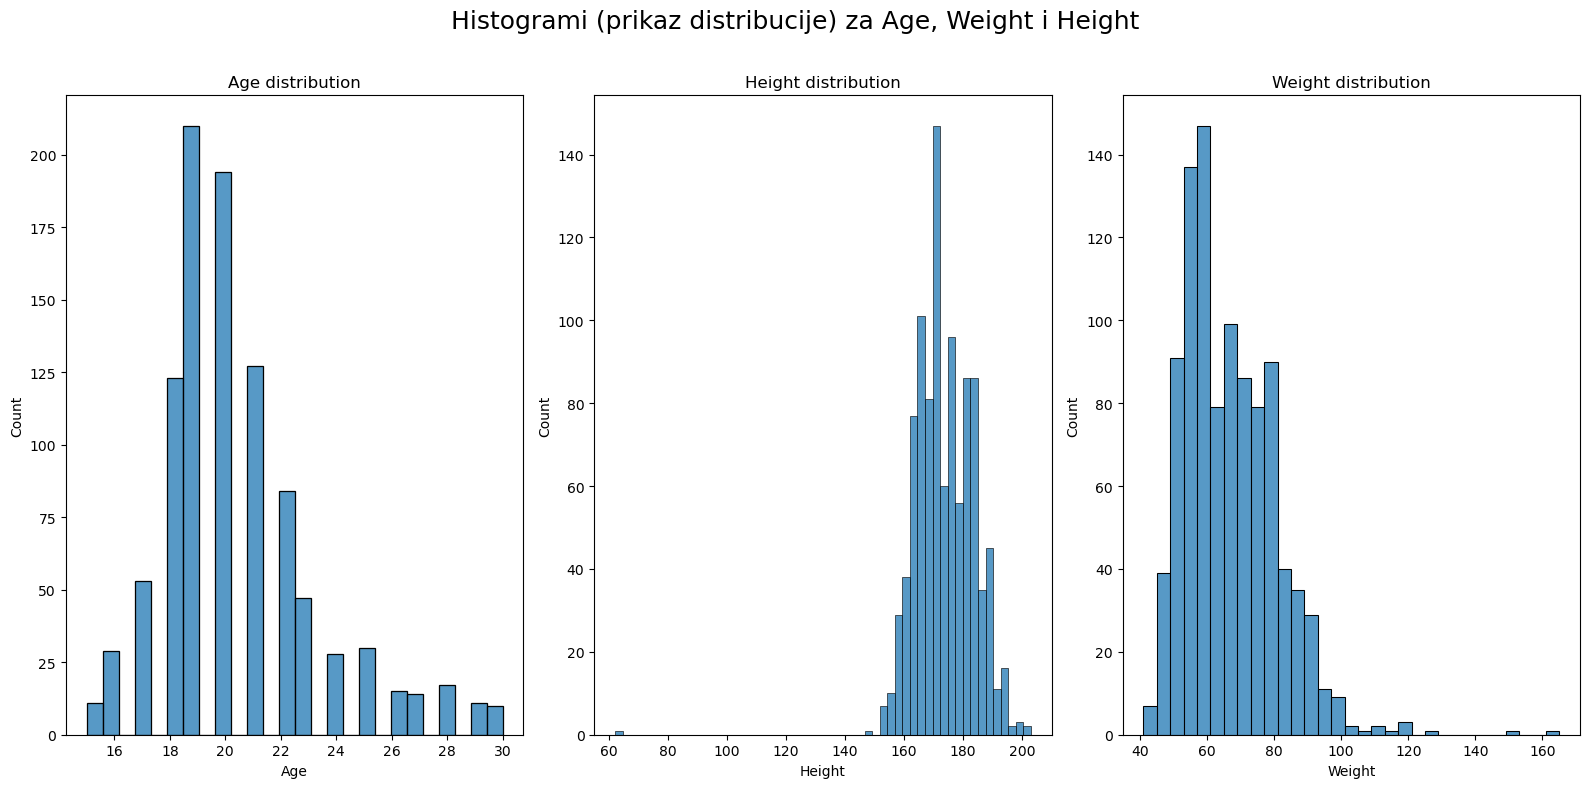

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Histogrami (prikaz distribucije) za Age, Weight i Height\n', size = 18)

sns.histplot(ax=axes[0], data=df, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

# Inter-kvartalni (IQR) metod
#### Metod koristi tzv. percentile sa kutijastog dijagrama (box plot) da odredi autjalere.
#### Ti autlajeri su već prikazani na grafikonu.
#### Ovaj metod je jednostavan i robustan na distribuciju podataka, odnosno ne zahteva normalnu distribuciju, što je slučaj kod nekih drugih metoda.

In [6]:
from IPython.display import Image
img = 'IQR.png'
Image(url=img, width=800)

In [10]:
np.percentile(df['Age'],5)

nan

#### Dobijamo nan jer skup podataka sadrži nedostajuće vrednosti

In [12]:
df['Age'].isna().sum()

7

#### Nedostajuće vrednosti zamenjujemo sa srednjom vrednosti

In [14]:
mean_value = df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [15]:
np.percentile(df['Age'],5)

17.0

In [16]:
mean_value = df['Height'].mean()
df['Height'].fillna(value=mean_value, inplace=True)

mean_value = df['Weight'].mean()
df['Weight'].fillna(value=mean_value, inplace=True)

In [17]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
    
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
 
    return multiple_outliers

#### Prikazujemo sve autlajere po atributu Height

In [19]:
feature_list = ['Height']

#drugi argument znaci da se prikazuju svi primeri koji imaju >0 autlajera
Outliers_IQR = IQR_method(df,0,feature_list)

print(Outliers_IQR)

[97, 220, 547, 676, 799, 992]


In [20]:
df[df.index.isin(Outliers_IQR)]['Height']

97     200.0
220    200.0
547    203.0
676     62.0
799    203.0
992    200.0
Name: Height, dtype: float64

##### Na primer, visina od 62cm može biti greška gde nije uneta cifra 1 na početku.

#### Prikazujemo sve autlajere po sva tri atributa.
#### Atributi se razmatraju odvojeno. Red će biti prikazan ako je autlajer bar po jednom od atributa.

In [23]:
feature_list = ['Age','Height','Weight']

Outliers_IQR = IQR_method(df,0,feature_list)

print(Outliers_IQR)

[33, 45, 72, 186, 191, 215, 221, 246, 286, 343, 392, 394, 422, 452, 461, 473, 478, 486, 503, 525, 530, 542, 546, 584, 590, 619, 637, 664, 668, 672, 677, 681, 683, 684, 715, 716, 795, 796, 801, 803, 824, 844, 853, 854, 898, 909, 929, 989, 990, 992, 998, 1006, 97, 220, 547, 676, 799, 292, 612, 793, 859, 885, 973]


In [24]:
df[df.index.isin(Outliers_IQR)][feature_list]

,Age,Height,Weight
33,27.0,170.0,70.0
45,27.0,181.0,78.0
72,28.0,168.0,52.0
97,19.0,200.0,75.0
186,29.0,169.0,65.0
...,...,...,...
989,30.0,168.0,54.0
990,29.0,180.0,93.0
992,30.0,200.0,150.0
998,28.0,192.0,105.0


#### Prikazujemo sve autlajere po sva tri atributa.
#### Atributi se razmatraju odvojeno. Red će biti prikazan ako je autlajer bar po dva atributa.

In [26]:
feature_list = ['Age','Height','Weight']

# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)

print(Outliers_IQR)

[715, 796, 992, 998]


In [27]:
#Primeri koji su autlajeri bar po 2 atributa od ova 3 koja razmatramo
df[df.index.isin(Outliers_IQR)][feature_list]

,Age,Height,Weight
715,29.0,183.0,111.0
796,27.0,189.0,113.0
992,30.0,200.0,150.0
998,28.0,192.0,105.0


#### Izbacujemo sve redove koji imaju su autlajer bar po jednom od atributa
#### Nakon toga prikazujemo kutijaste dijagrame.

In [29]:
Outliers_IQR = IQR_method(df,0,feature_list)

df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

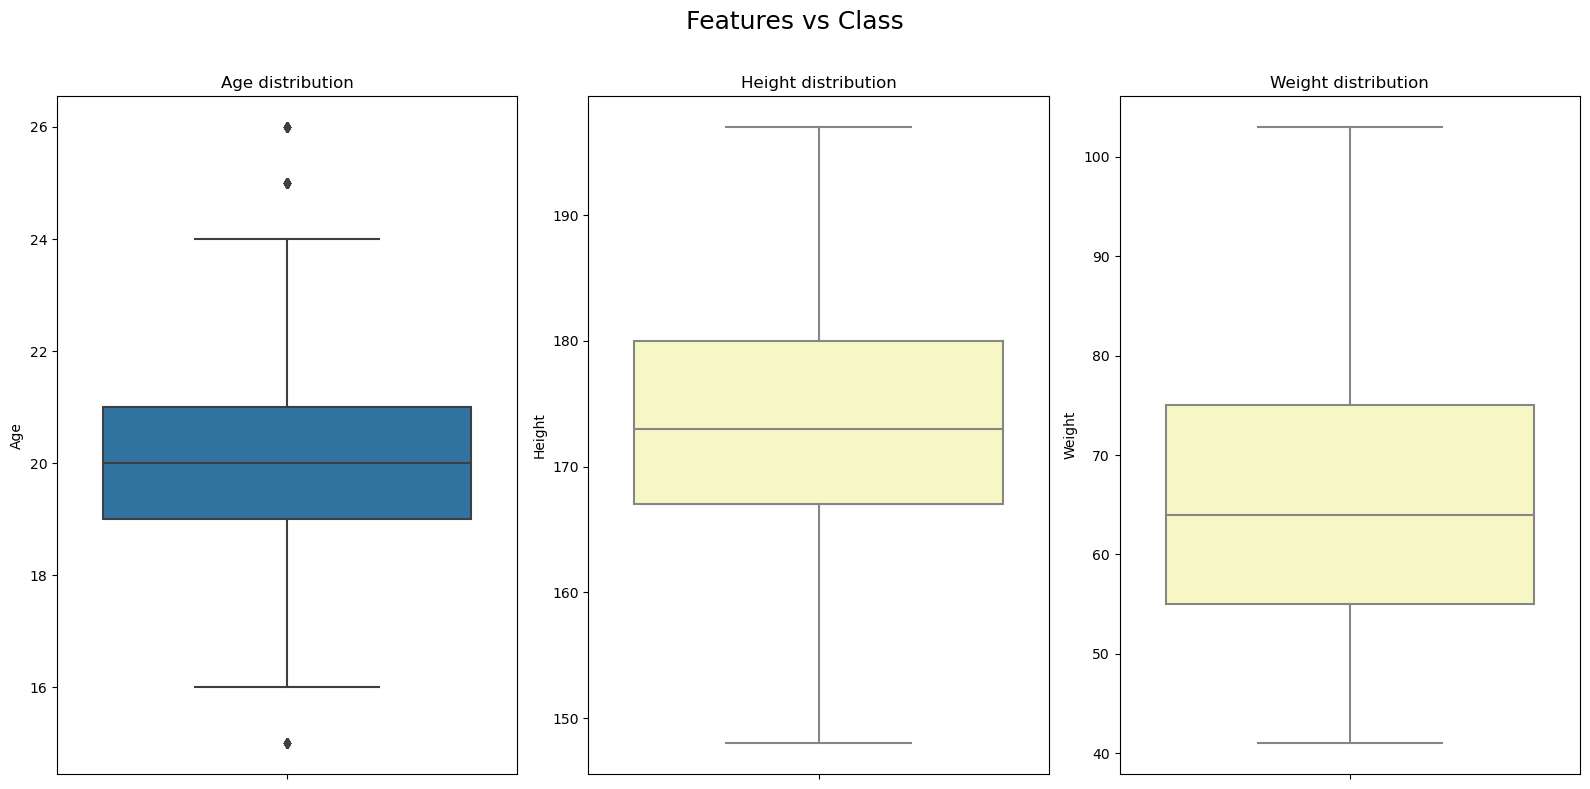

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0], data=df_out, y='Age')
axes[0].set_title("Age distribution");

sns.boxplot(ax=axes[1], data=df_out, y='Height', palette='Spectral')
axes[1].set_title("Height distribution");

sns.boxplot(ax=axes[2], data=df_out, y='Weight', palette='Spectral')
axes[2].set_title("Weight distribution");

plt.tight_layout()

#### Sa grafika se moze videti da se kod atributa Age distribucija značajnije promenlia nakon uklanjanja autlajera, što je izvazvalo pojavu novih autlajera.

# Metod standardne devijacije
#### Ovaj metod je prikaladan kada je atribut normalno distribuiran.
#### U zavisnosti od našeg odabira sve vrednosti koje su udaljene 2 ili 3 standardne devijacije od srednje vrednosti možemo smatrati autlajerima.
#### Za veće skupove podataka 3 je bojli izbor.

In [8]:
img = 'Stdev_method.png'
Image(url=img, width=800)

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


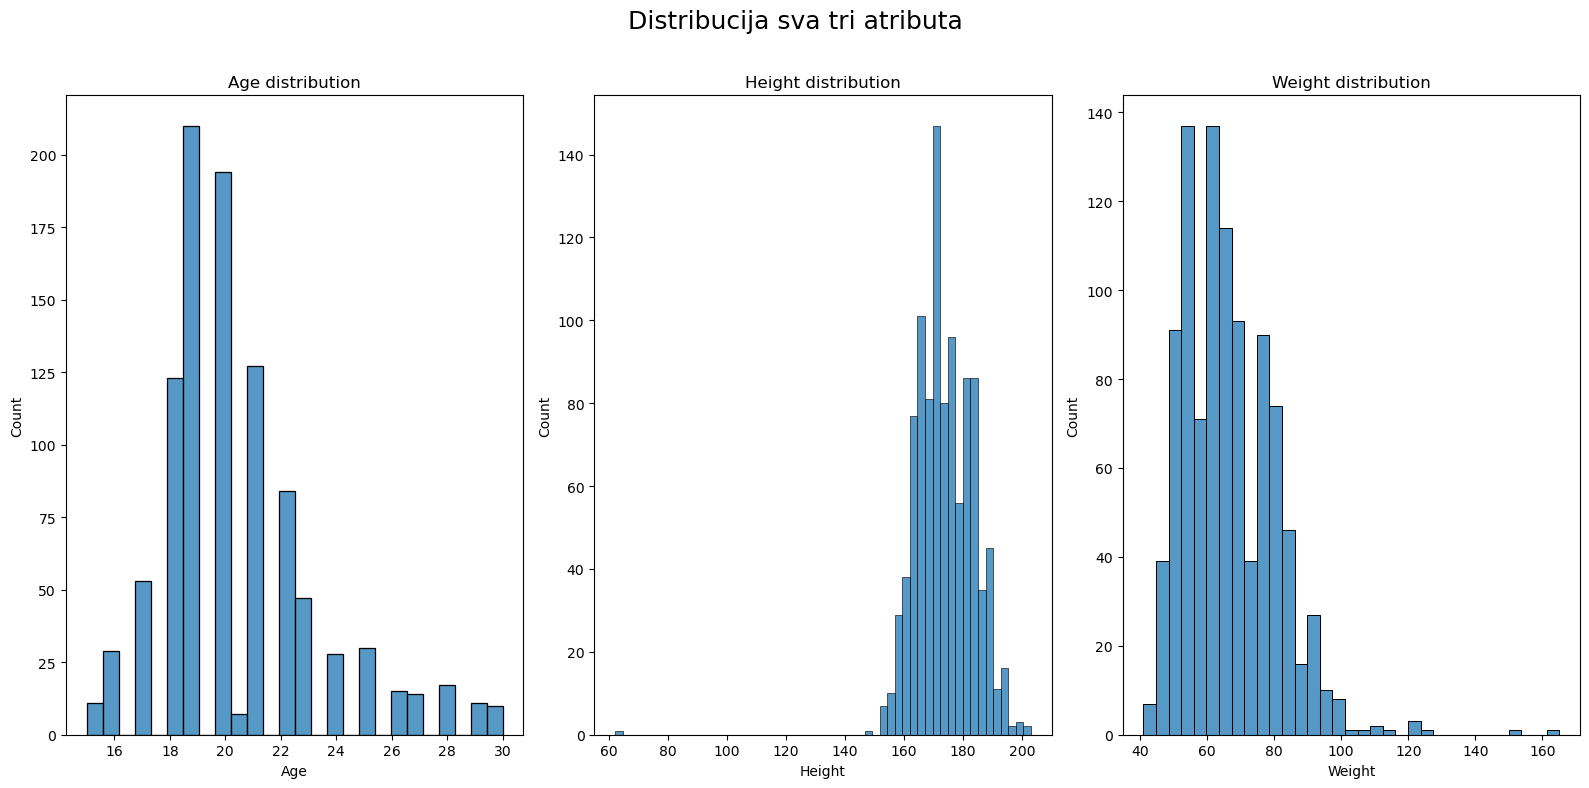

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Distribucija sva tri atributa\n', size = 18)

sns.histplot(ax=axes[0], data=df, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

#### Sa grafika se može videti da su atributi normlano distribuirani uz prisustvo autlajera.
#### Trebalo bi biti pažljiv sa upotrebom ovog metoda jer prisustvo autlajera koji mnogo odstupaju od srednje vrednosti može pomeriti srednju vrednost i povećati standardnu devijaciju tako da ne oslikava realno stanje. U tom slučaju metod može biti nepouzdan. Tada je bolje koristiti alternative kao što je IQR ili još jedan metod koji ćemo prikzati u nastavku.
#### Uticaj autlajera na srednju vrednost i st.dev. možemo videti na primer poređenjem srednje vrednosti i medijana. Ako postoji značajna razlika, onda je bolje koristiti robusnije metode.

In [36]:
df['Weight'].mean()

66.40505050505051

In [37]:
df['Weight'].median()

65.0

In [38]:
df['Weight'].std()

13.701713114317895

#### Pozivi funkcija i prikazivanje grafika u ovom slučaju vrlo je slično kao za IQR metod pa ga nećemo posebno opisivati.

In [40]:
def StDev_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the standard deviation method.
    """
    outlier_indices = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        
        # calculate the cutoff value
        cut_off = data_std * 3
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_indices.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    
    return multiple_outliers

In [41]:
feature_list = ['Weight']

Outliers_StDev = StDev_method(df,0,feature_list)

df[df.index.isin(Outliers_StDev)][feature_list]

,Age,Weight,Height
186,29.0,65.0,169.000000
191,29.0,67.0,160.000000
221,30.0,71.0,178.000000
292,21.0,120.0,184.000000
343,29.0,56.0,168.000000
392,30.0,47.0,160.000000
461,29.0,96.0,189.000000
473,29.0,64.0,170.000000
478,30.0,80.0,180.000000
542,29.0,92.0,182.000000


The lower bound value is: 25.299911162096826
The upper bound value is: 107.51018984800419


C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


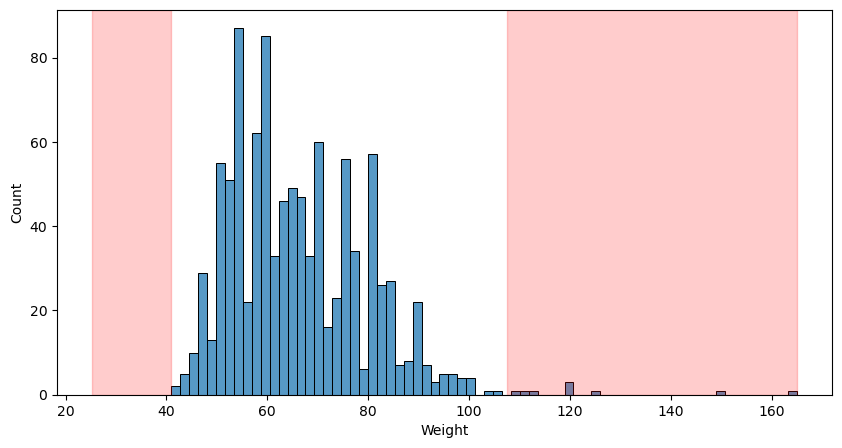

In [42]:
data_mean, data_std = df['Weight'].mean(), df['Weight'].std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

plt.figure(figsize = (10,5))
sns.histplot(x = 'Weight', data=df, bins=70)
plt.axvspan(xmin = lower,xmax= df.Weight.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.Weight.max(),alpha=0.2, color='red')

In [74]:
feature_list = ['Age','Weight','Height']
Outliers_StDev = StDev_method(df,0,feature_list)

df[df.index.isin(Outliers_StDev)][feature_list]

,Age,Weight,Height
186,29.0,65.0,169.000000
191,29.0,67.0,160.000000
221,30.0,71.0,178.000000
292,21.0,120.0,184.000000
343,29.0,56.0,168.000000
392,30.0,47.0,160.000000
461,29.0,96.0,189.000000
473,29.0,64.0,170.000000
478,30.0,80.0,180.000000
542,29.0,92.0,182.000000


In [76]:
# dropping outliers
df_out2 = df.drop(Outliers_StDev, axis = 0).reset_index(drop=True)

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


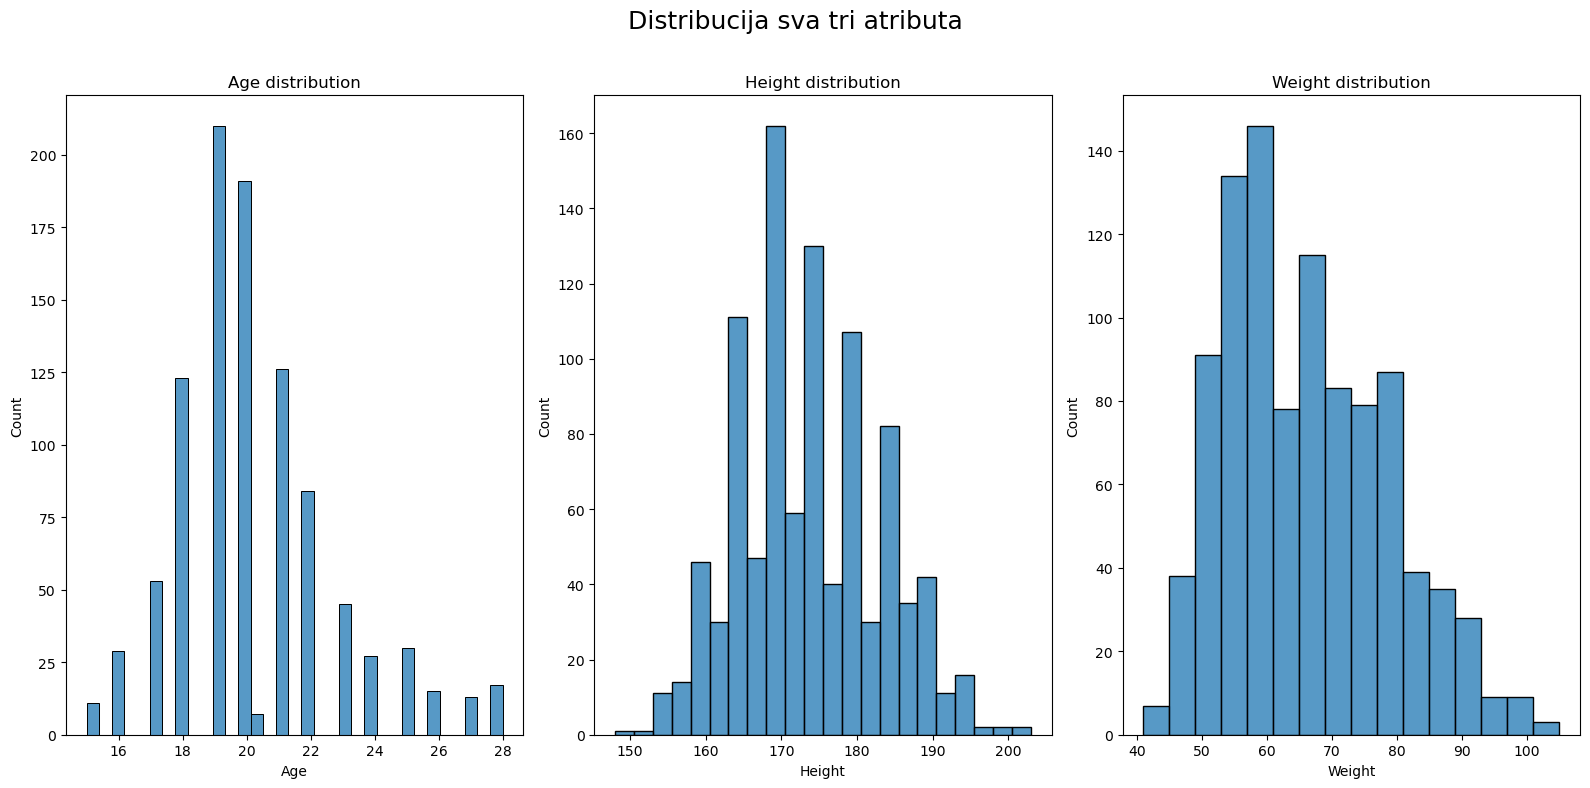

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Distribucija sva tri atributa\n', size = 18)

sns.histplot(ax=axes[0], data=df_out2, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df_out2, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df_out2, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

In [84]:
df_out2['Weight'].mean()

65.77278390428238

In [86]:
df_out2['Weight'].median()

64.0

# Metod Z-vrednosti (Z-score)

#### Z-score za jednu vrednost iz distribucije meri koliko st. dev. je ta vrednost udaljena od srednje vrednosti, ali ako je distribucija standardizovana (normalizovana).
#### Distribucija je standardizovana ako je svedena na to da ima srednju vrednost 0 i st. dev. 1.
#### Ovaj metod je isti kao i St. dev. metod samo se prvo standardizuje distribucija.
#### Ovaj metod se češće koristi u praksi jer omogućava poređenje z-scores nezavisno od skale u kojoj se meri originalni atribut. Na primer, neka vrednost za Age i neka za Height mogu imati z-sore od 2 što znači da su udaljene 2 st. dev. od srednje vrednosti.

In [10]:
img = 'Z_score.png'
Image(url=img, width=800)

In [107]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    
    return multiple_outliers

In [109]:
feature_list = ['Weight']
Outliers_Zscore = z_score_method(df,0,feature_list)

df[df.index.isin(Outliers_Zscore)][feature_list]

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0


In [111]:
feature_list = ['Weight']
Outliers_StDev = StDev_method(df,0,feature_list)

df[df.index.isin(Outliers_StDev)][feature_list]

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0


# Modifikovani Metod Z-vrednosti (Z-score)

#### U slučaju da postoji veći broj autlajera ili izraziti autlajeri koristimo Modifikovani metod Z-vrednosti.
#### Kod ovog metoda umesto srednje vrednosti koristi se medijan koji je robustan na autlajere.
#### Skor koji se računa je standardizovano rasotjanje od medijana (median absolute deviation, MAD).

In [114]:
from scipy.stats import median_abs_deviation

def z_scoremod_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score modified method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        MAD = median_abs_deviation
        
        mod_z_score = abs(0.6745*(df[column] - data_mean)/MAD(df[column]) )
                
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[mod_z_score >threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[mod_z_score >threshold]
    
    return multiple_outliers

In [116]:
feature_list = ['Weight']
Outliers_ZscoreMod = z_scoremod_method(df,0,feature_list)

df[df.index.isin(Outliers_ZscoreMod)][feature_list]

,Weight
292,120.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0


In [118]:
feature_list = ['Weight']
Outliers_Zscore = z_score_method(df,0,feature_list)

df[df.index.isin(Outliers_Zscore)][feature_list]

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0


C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


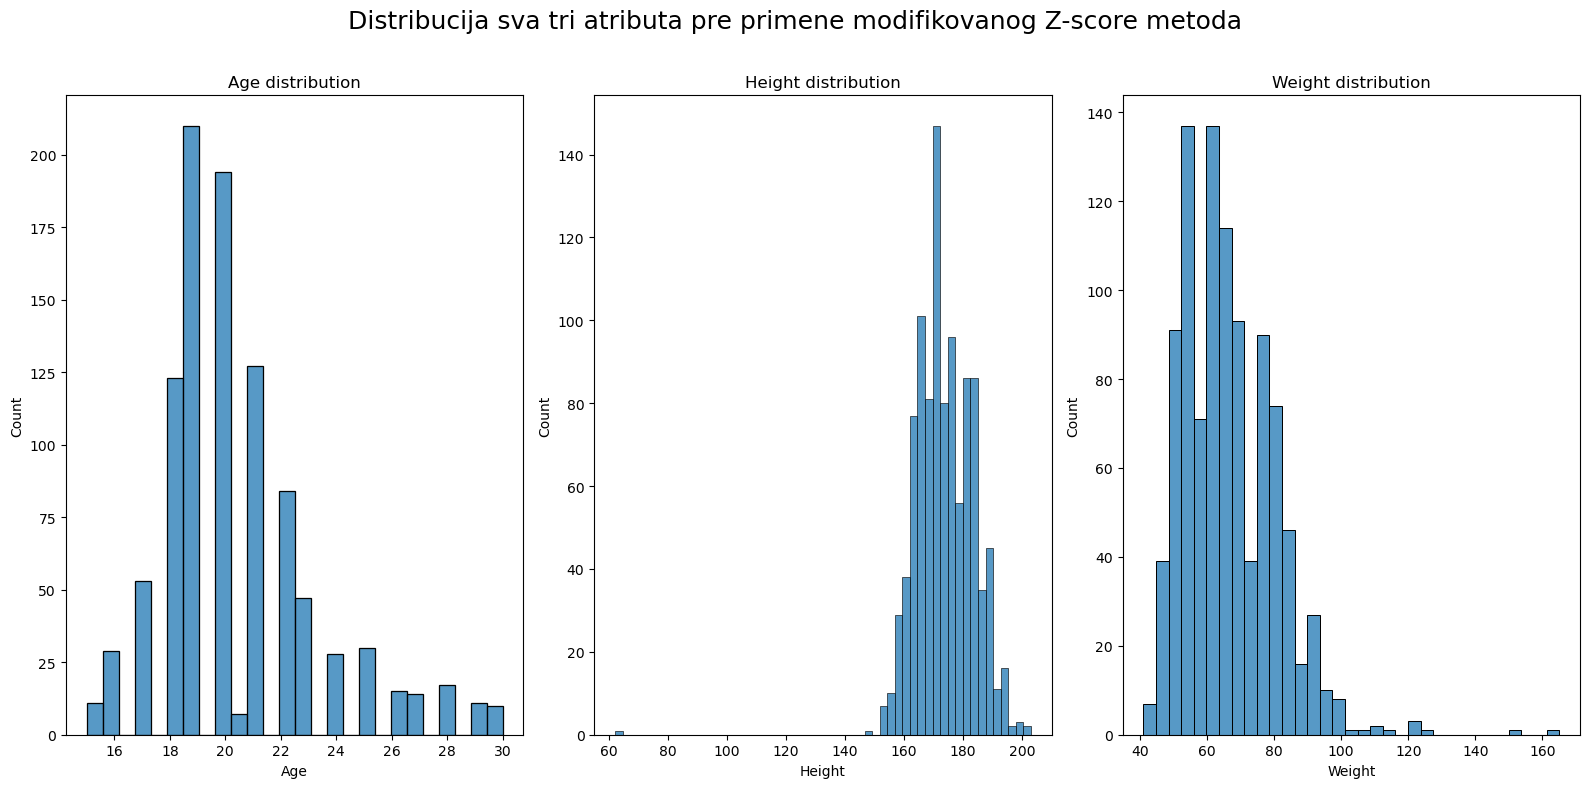

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Distribucija sva tri atributa pre primene modifikovanog Z-score metoda\n', size = 18)

sns.histplot(ax=axes[0], data=df, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

In [58]:
feature_list = ['Age','Weight','Height']
Outliers_ZscoreMod = z_scoremod_method(df,0,feature_list)

# dropping outliers
df_out3 = df.drop(Outliers_ZscoreMod, axis = 0).reset_index(drop=True)

Total number of outliers is: 1


In [59]:
print(Outliers_ZscoreMod)

[30, 33, 40, 44, 45, 72, 128, 132, 152, 156, 157, 158, 174, 177, 186, 191, 193, 202, 206, 215, 219, 221, 226, 246, 263, 265, 286, 303, 306, 312, 338, 343, 379, 385, 387, 388, 392, 394, 402, 422, 447, 452, 461, 472, 473, 478, 486, 496, 503, 525, 530, 537, 539, 542, 543, 546, 584, 590, 608, 619, 635, 637, 663, 664, 668, 672, 675, 677, 680, 681, 683, 684, 700, 714, 715, 716, 742, 745, 748, 754, 755, 756, 760, 766, 768, 776, 795, 796, 801, 803, 824, 844, 853, 854, 867, 870, 878, 898, 909, 929, 950, 951, 989, 990, 992, 998, 1006, 1008, 292, 793, 859, 885, 973, 676]


C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


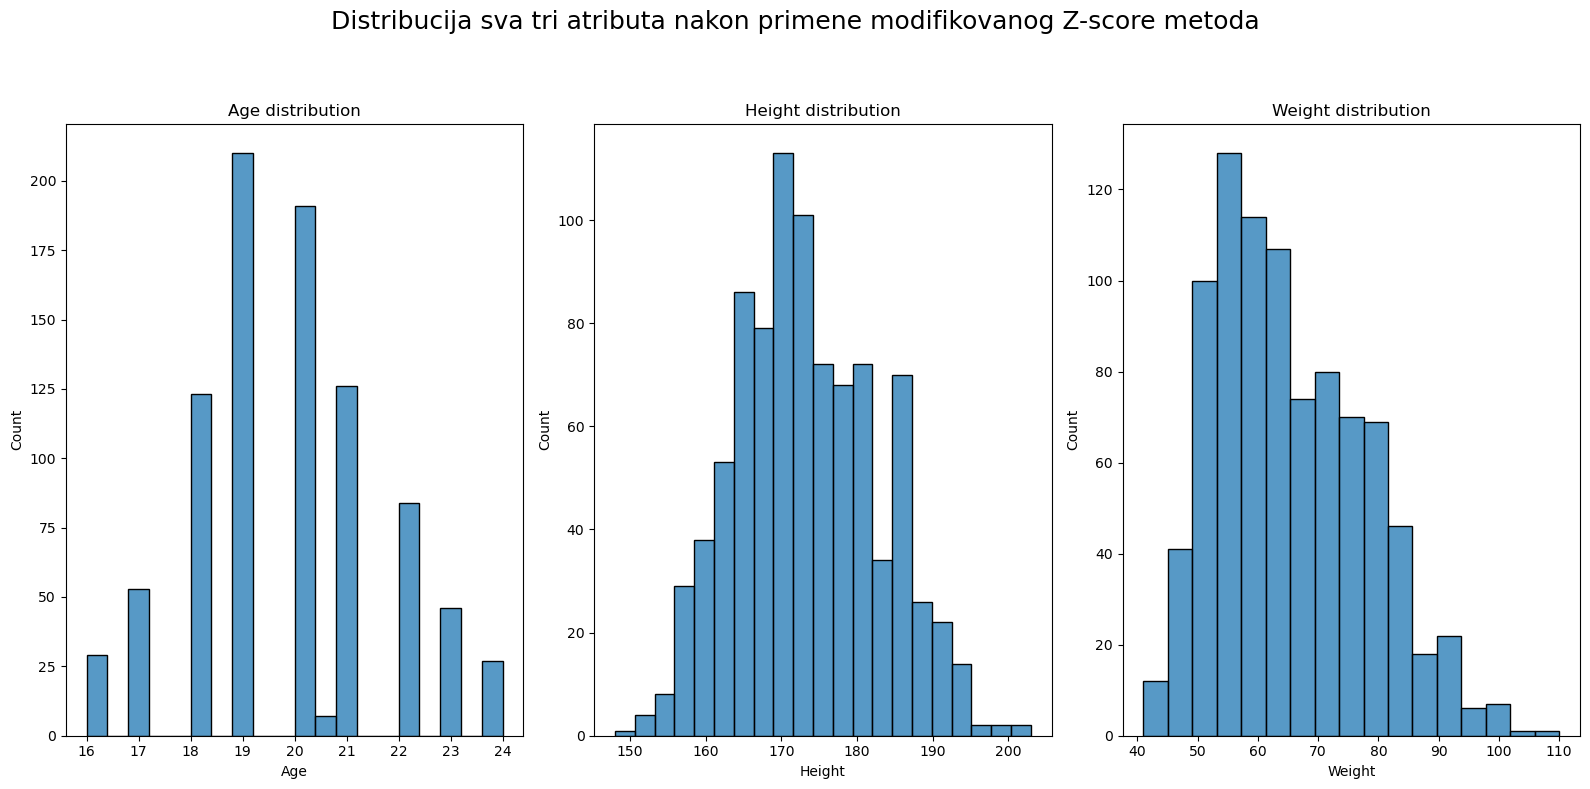

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,8))
fig.suptitle('Distribucija sva tri atributa nakon primene modifikovanog Z-score metoda\n\n', size = 18)

sns.histplot(ax=axes[0], data=df_out3, x="Age", multiple="dodge")
axes[0].set_title("Age distribution");

sns.histplot(ax=axes[1], data=df_out3, x="Height", multiple="dodge")
axes[1].set_title("Height distribution");

sns.histplot(ax=axes[2], data=df_out3, x="Weight", multiple="dodge")
axes[2].set_title("Weight distribution");

plt.tight_layout()

# Tehnike za detekciju autlajera po više atributa u isto vreme

## Izolaciona šuma (Isolation forest)

#### Tehnika zasnovana na modelu slučajnih šuma (random forest). Za razliku od slučajnih šuma tehnika je nenadgledana tj. ne zahteva klasno obeležije.
#### Kao i kod slučajnih šuma, postoji određeni broj hiper-parametara od čijih vrednosti zavise rezultati metoda.

#### Suština ovih metoda je da određene vrednosti mogu biti autlajeri po jednom atributu ali ne odstupaju mnogo od ostalih tačaka kada se svi atributi uzmu u obzir.

In [12]:
img = 'IsolationForest.png'
Image(url=img, width=800)

In [65]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=150, max_samples='auto', contamination=0.01)

#### Parametar contamination jako utiče na broj rezultujućih autlajera i treblao bi ga zadati na neki razuman procenat u skaladu sa očekivanjima za dati skup podataka, na primer 5%.
#### U slučaju da zadamo preveliki contamination autlajeri se mogu soritrati po skoru koji vraća Isolation forest pa se onda može odabrati neki prag iznad koga će se primer smatrati za autlajer.

In [129]:
feature_list = ['Age','Weight','Height']

tmpdf = df[feature_list]

model.fit(tmpdf)

C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_estimators=150)

In [130]:
model.fit(tmpdf)

scores=model.decision_function(tmpdf)
anomaly=model.predict(tmpdf)

tmpdf['scores']=scores
tmpdf['anomaly']=anomaly

tmpdf.head(10)

C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kocha\AppData\Local\Temp\ipykernel_33368\1924562714.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['scores']=scores
C:\Users\kocha\AppData\Local\Temp\ipykernel_33368\1924562714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['anomaly']=anomaly


,Age,Weight,Height,scores,anomaly
0,20.0,48.0,163.0,0.178596,1
1,19.0,58.0,163.0,0.215152,1
2,20.0,67.0,176.0,0.234870,1
3,22.0,59.0,172.0,0.201337,1
4,20.0,59.0,170.0,0.232631,1
5,20.0,77.0,186.0,0.208951,1
6,20.0,50.0,177.0,0.166176,1
7,19.0,90.0,184.0,0.159752,1
8,18.0,55.0,166.0,0.206202,1
9,19.0,60.0,174.0,0.235759,1


In [132]:
anomaly = tmpdf.loc[tmpdf['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

anomaly.sort_values(['scores'], ascending=True)

Total number of outliers is: 11


,Age,Weight,Height,scores,anomaly
992,30.0,150.0,200.000000,-0.148600,-1
998,28.0,105.0,192.000000,-0.067351,-1
715,29.0,111.0,183.000000,-0.052129,-1
885,23.0,165.0,173.514141,-0.048574,-1
796,27.0,113.0,189.000000,-0.047046,-1
392,30.0,47.0,160.000000,-0.030832,-1
461,29.0,96.0,189.000000,-0.021595,-1
793,24.0,120.0,185.000000,-0.018122,-1
222,24.0,42.0,153.000000,-0.014426,-1
859,20.0,125.0,190.000000,-0.008111,-1


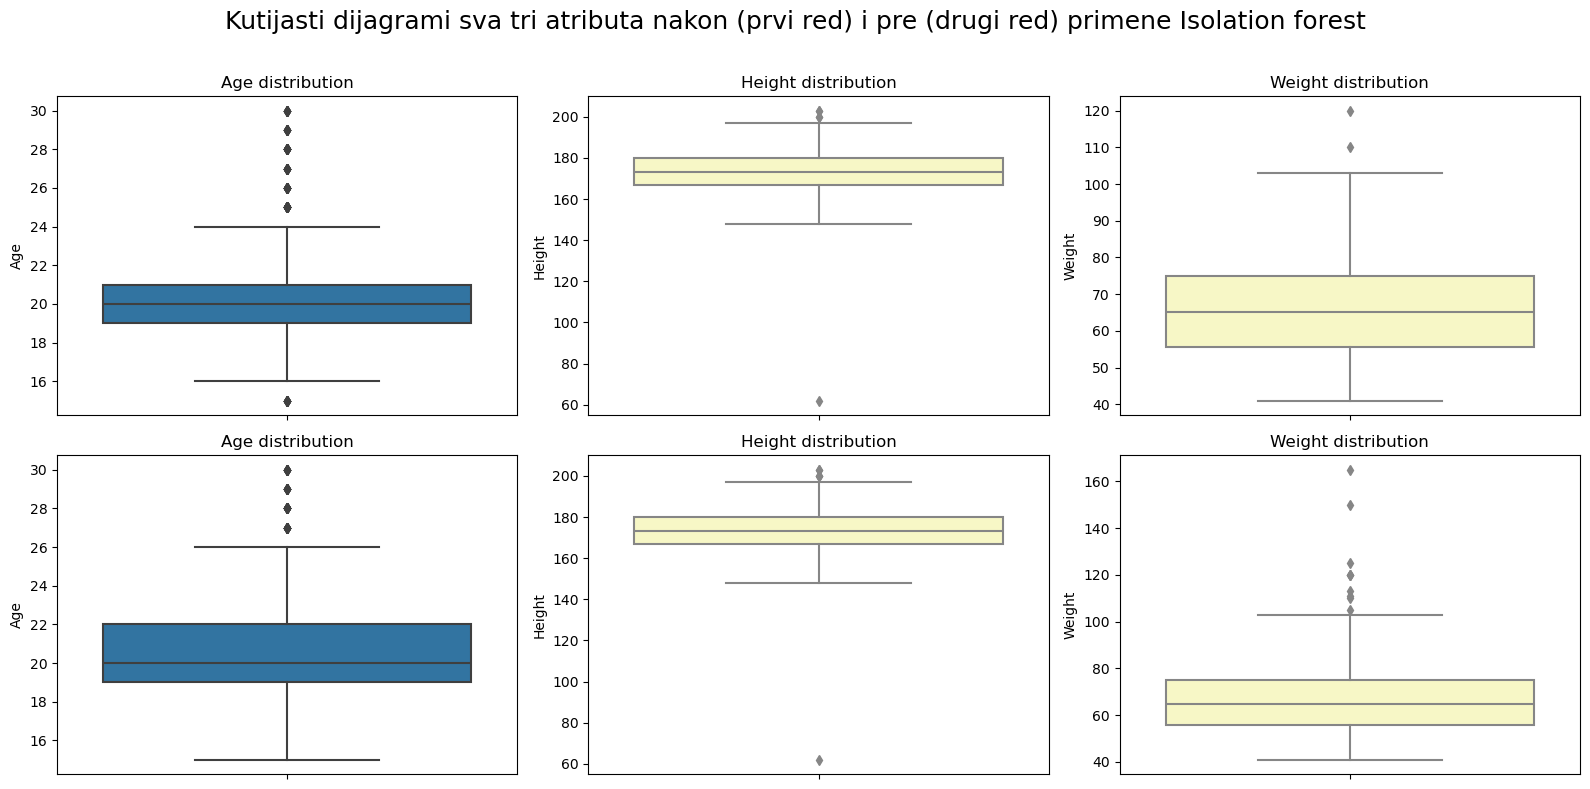

In [139]:
df_out4 = df.drop(anomaly_index, axis = 0).reset_index(drop=True)

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,8))
fig.suptitle('Kutijasti dijagrami sva tri atributa nakon (prvi red) i pre (drugi red) primene Isolation forest\n', size = 18)

sns.boxplot(ax=axes[0,0], data=df_out4, y='Age')
axes[0,0].set_title("Age distribution");

sns.boxplot(ax=axes[0,1], data=df_out4, y='Height', palette='Spectral')
axes[0,1].set_title("Height distribution");

sns.boxplot(ax=axes[0,2], data=df_out4, y='Weight', palette='Spectral')
axes[0,2].set_title("Weight distribution");


sns.boxplot(ax=axes[1,0], data=df, y='Age')
axes[1,0].set_title("Age distribution");

sns.boxplot(ax=axes[1,1], data=df, y='Height', palette='Spectral')
axes[1,1].set_title("Height distribution");

sns.boxplot(ax=axes[1,2], data=df, y='Weight', palette='Spectral')
axes[1,2].set_title("Weight distribution");


plt.tight_layout()

#### Autlajeri se takođe u 2d eventualno 3d mogu detektovati i pomoću dijagrama raspipanja (scatter plot).
#### Na primer, na slici ispod vidimo (očekivani) linearni odnos između visine i težine, gde su tačke koje odstupaju od toga su potencijalni autlajeri.
#### Proverićemo rezultate Isolation forest u odnosu na naše uvide sa grafika.

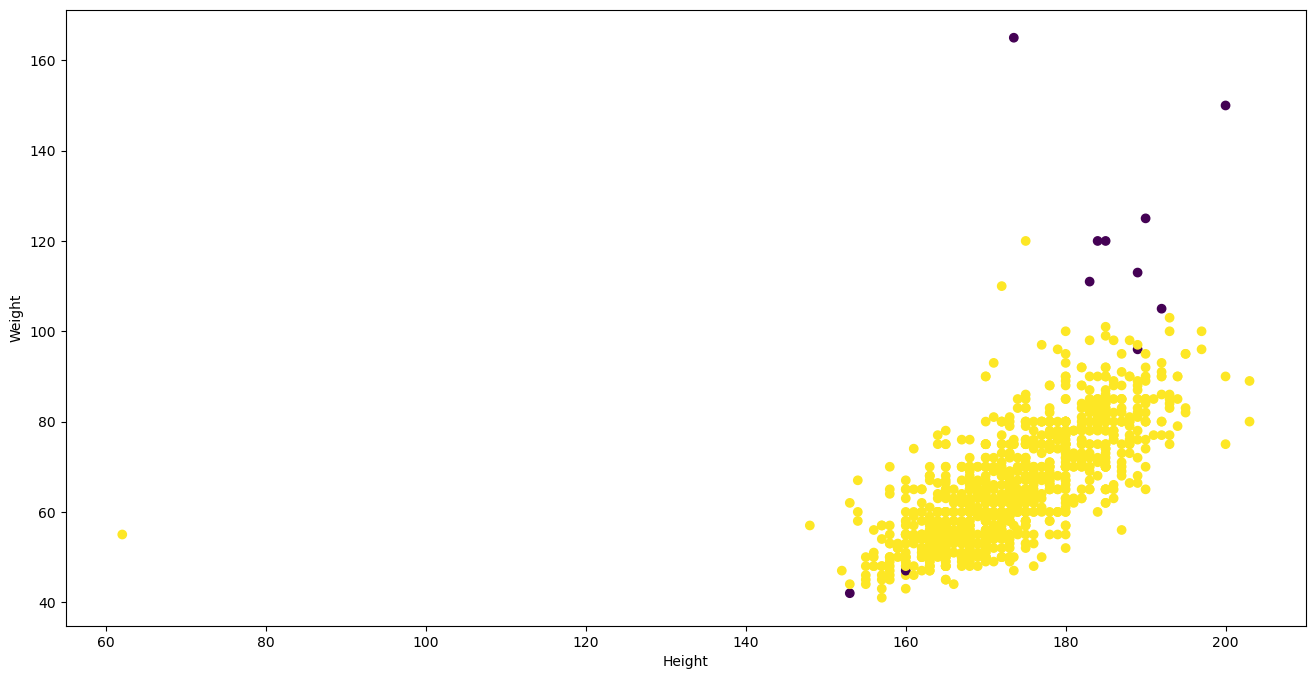

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tmpdf['Height'], tmpdf['Weight'], c=tmpdf['anomaly'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

#### Sada ćemo primenti Isolation forest na ceo skup podataka, što će zahtevati predprocesiranje podataka, kao što ćete videti u nastavku.

In [145]:
tmpdf = df.copy()

model.fit(tmpdf)

ValueError: could not convert string to float: 'never smoked'

#### Metod ne može da radi sa ne-numeričkim atributima pa moramo da odradimo konverzije.

In [148]:
pd.set_option('display.max_info_columns', len(tmpdf.columns))
tmpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    Music                           1007 non-null   float64
 1    Slow songs or fast songs        1008 non-null   float64
 2    Dance                           1006 non-null   float64
 3    Folk                            1005 non-null   float64
 4    Country                         1005 non-null   float64
 5    Classical music                 1003 non-null   float64
 6    Musical                         1008 non-null   float64
 7    Pop                             1007 non-null   float64
 8    Rock                            1004 non-null   float64
 9    Metal or Hardrock               1007 non-null   float64
 10   Punk                            1002 non-null   float64
 11   Hiphop, Rap                     1006 non-null   float64
 12   Reggae, Ska       

In [150]:
tmpdf.select_dtypes('object')

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...
1005,current smoker,drink a lot,i am often running late,everytime it suits me,few hours a day,female,right handed,secondary school,no,city,house/bungalow
1006,never smoked,social drinker,i am often early,sometimes,less than an hour a day,male,left handed,masters degree,no,village,house/bungalow
1007,tried smoking,social drinker,i am often running late,only to avoid hurting someone,most of the day,female,right handed,secondary school,yes,city,block of flats
1008,tried smoking,social drinker,i am often running late,sometimes,most of the day,female,right handed,college/bachelor degree,no,city,block of flats


In [152]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in tmpdf.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    tmpdf[column] = le.fit_transform(tmpdf[column])
    label_encoders[column] = le

print(tmpdf)

      Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hard

In [154]:
model.fit(tmpdf)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Model ne može da radi sa nedostajućim vrednosti pa moramo da ih rešimo.

In [157]:
tmpdf.isna().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         0
Education                   0
Only child                  0
Village - town              0
House - block of flats      0
Length: 150, dtype: int64

#### Vidimo da su nedostajuće vrednosti uglanom prisutne kod kategoričkih atributa.
#### U ovom slučaju, bez dodatnog istraživanja, odlučeno je da se nedostajuće vrednosti zamene sa vrednošću 0.
#### Naravno, uvek se savetuje dodatno istraživanje i donošenje odluke o tome da li će se upošte zadržati redovi sa nedostajućim vrednosti i kako će se te vrednosti zameniti.

In [174]:
tmpdf = tmpdf.apply(lambda x: x.fillna(0))

In [176]:
model.fit(tmpdf)

scores=model.decision_function(tmpdf)
anomaly=model.predict(tmpdf)

tmpdf['scores']=scores
tmpdf['anomaly']=anomaly

tmpdf.head(10)

C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,scores,anomaly
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,48.0,1.0,0,1,0,0,1,0,0.067565,1
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,58.0,2.0,0,1,0,0,0,0,0.092070,1
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,67.0,2.0,0,1,5,0,0,0,0.057574,1
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,59.0,1.0,0,1,0,1,0,1,0.012445,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,59.0,1.0,0,1,5,0,1,1,0.117041,1
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,77.0,1.0,1,1,5,0,0,0,0.110857,1
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,50.0,1.0,0,1,5,0,1,1,0.072906,1
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,90.0,1.0,1,1,0,0,0,1,0.101734,1
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,55.0,1.0,0,1,5,0,0,1,0.068278,1
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,60.0,3.0,0,1,5,0,0,0,0.092764,1


In [177]:
anomaly = tmpdf.loc[tmpdf['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 11


In [178]:
anomaly.sort_values(['scores'], ascending=True)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,scores,anomaly
966,5.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,...,55.0,1.0,0,0,0,0,0,1,-0.038691,-1
512,5.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,...,58.0,1.0,0,1,0,1,1,1,-0.026444,-1
560,5.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,...,57.0,2.0,0,1,1,1,1,1,-0.019729,-1
458,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,...,52.0,1.0,0,1,5,0,1,1,-0.018793,-1
447,3.0,2.0,1.0,3.0,3.0,3.0,4.0,1.0,1.0,1.0,...,55.0,3.0,0,0,3,0,1,1,-0.016463,-1
487,5.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,66.0,3.0,0,1,5,0,1,1,-0.011365,-1
965,5.0,5.0,5.0,3.0,3.0,3.0,5.0,5.0,5.0,2.0,...,65.0,2.0,0,1,4,0,0,0,-0.006049,-1
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,49.0,3.0,0,0,4,0,0,1,-0.004497,-1
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,...,78.0,1.0,1,1,3,0,2,0,-0.002588,-1
41,5.0,4.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,5.0,...,80.0,3.0,1,1,0,0,0,0,-0.001533,-1


In [179]:
len(tmpdf)

1010

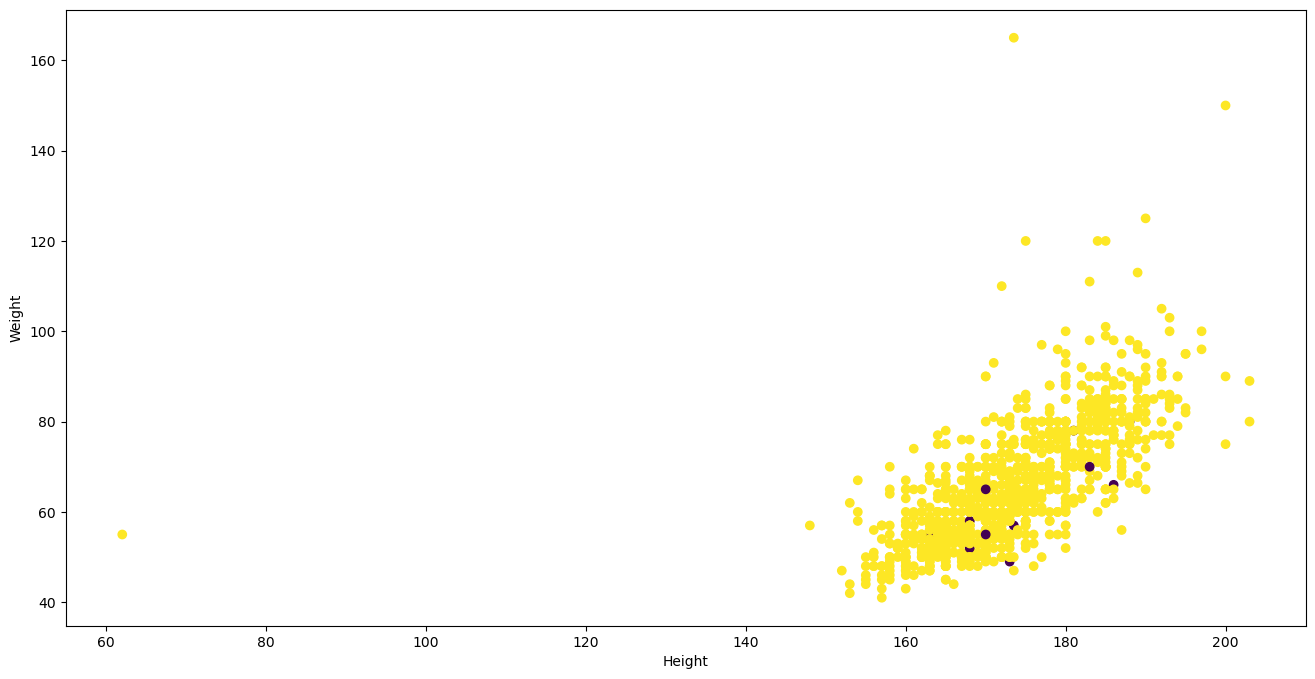

In [180]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tmpdf['Height'], tmpdf['Weight'], c=tmpdf['anomaly'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

# Metod Robust Mahalonibis Distance

#### Takođe metod za detekciju autlajera u više atributa istovremeno.
#### Grubo objašnjenje je da se određuje odstupanje vrednosti od normalne distribucije u više-dimenzionom prostoru.
#### Za zainteresovane detaljno objašnjenje dato je ovde https://www.machinelearningplus.com/statistics/mahalanobis-distance/.

In [187]:
import copy 
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = [] #pretpostavlja se da MD prati Hi-kvadrat distribuciju. Autlajeri su tacke koje imaju vrednost koja je malo verovatna 
    #videti tacku 6. ovde https://www.machinelearningplus.com/statistics/mahalanobis-distance/
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [189]:
feature_list = ['Age','Weight','Height']

df_mah = df[feature_list]

In [191]:
outliers_mahal_rob, md_rb = robust_mahalanobis_method(df_mah)

In [192]:
df_mah.index[outliers_mahal_rob]

Index([292, 392, 612, 676, 715, 793, 796, 859, 885, 973, 989, 992], dtype='int64')

In [194]:
df_mah.iloc[df_mah.index[outliers_mahal_rob]]

,Age,Weight,Height
292,21.0,120.0,184.000000
392,30.0,47.0,160.000000
612,23.0,110.0,172.000000
676,20.0,55.0,62.000000
715,29.0,111.0,183.000000
793,24.0,120.0,185.000000
796,27.0,113.0,189.000000
859,20.0,125.0,190.000000
885,23.0,165.0,173.514141
973,20.0,120.0,175.000000


In [197]:
df_mah['anomaly'] = 0
df_mah.loc[df_mah.index.isin(outliers_mahal_rob),'anomaly']=1

C:\Users\kocha\AppData\Local\Temp\ipykernel_33368\2849246856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mah['anomaly'] = 0


In [199]:
df_mah.loc[df_mah.index.isin(outliers_mahal_rob)]

,Age,Weight,Height,anomaly
292,21.0,120.0,184.000000,1
392,30.0,47.0,160.000000,1
612,23.0,110.0,172.000000,1
676,20.0,55.0,62.000000,1
715,29.0,111.0,183.000000,1
793,24.0,120.0,185.000000,1
796,27.0,113.0,189.000000,1
859,20.0,125.0,190.000000,1
885,23.0,165.0,173.514141,1
973,20.0,120.0,175.000000,1


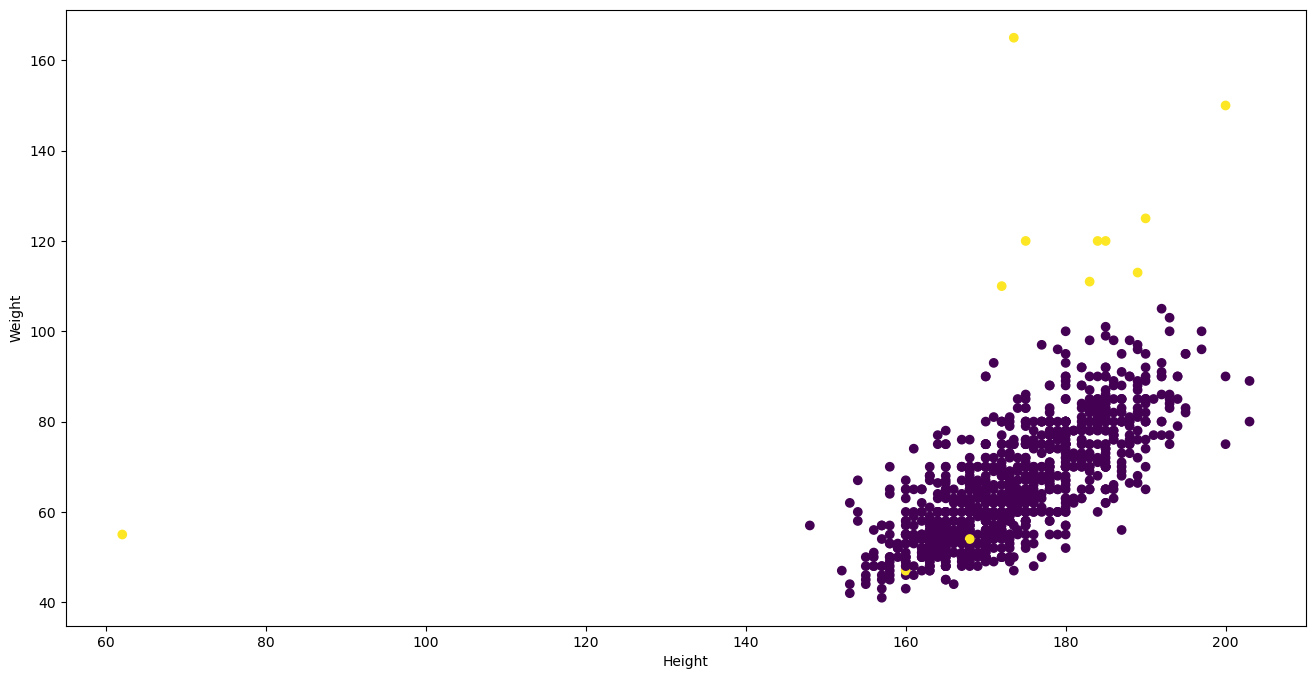

In [201]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_mah['Height'], df_mah['Weight'], c=df_mah['anomaly'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

# Upotreba DBSCAN (Density-Based Spatial Clustering of Applications with Noise) klasterovanja

#### Sam DBSCAN metod svaku od tačaka iz skupa podataka klasifikuje u tri kategoije od kojih je jedna šum (noise).
#### Tačke koje su šum smatraju se za autlajere.
#### Mana ovog kao i Isolation forest pristupa je osetljivost na parametre.
#### U nastavku je prikazan jedan način za određivanje parametara DBSCAN kao i primena na ovaj skup podataka.

In [14]:
img = 'DBScan.png'
Image(url=img, width=800)

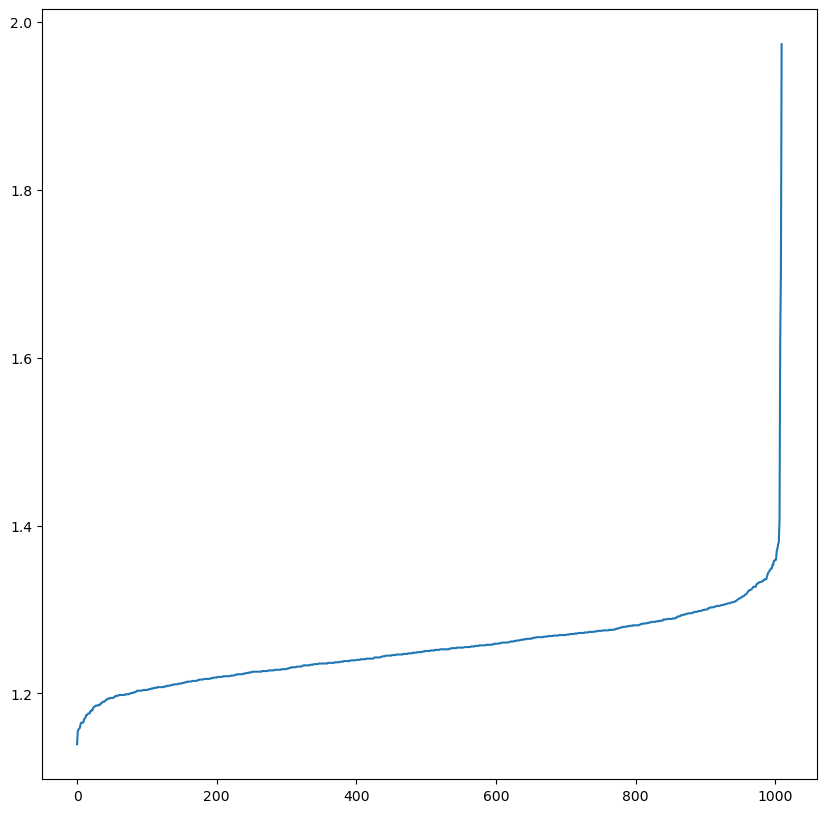

In [205]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

nbr_neigh = 5
neigh = NearestNeighbors(n_neighbors=nbr_neigh)
nbrs = neigh.fit(tmpdf)
distances, indices = nbrs.kneighbors(tmpdf)

distances = distances[:,nbr_neigh-1]
distances = np.sort(distances, axis=0)

plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(np.log10(distances))

In [206]:
m = DBSCAN(eps=10**1.33, min_samples=5)#min_samples je MinPts
m.fit(tmpdf)

DBSCAN(eps=21.379620895022324)

In [208]:
np.unique(m.labels_)

array([-1,  0], dtype=int64)

In [211]:
tmpdf['dbscan_cluster']=m.labels_

In [213]:
tmpdf['dbscan_cluster'].value_counts()

dbscan_cluster
 0    994
-1     16
Name: count, dtype: int64

In [215]:
tmpdf.loc[tmpdf['dbscan_cluster']==-1]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,scores,anomaly,dbscan_cluster
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,...,1.0,1,1,3,0,2,0,-0.002588,-1,-1
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3.0,0,0,4,0,0,1,-0.004497,-1,-1
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,1.0,0,1,5,0,0,1,0.085164,1,-1
458,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,...,1.0,0,1,5,0,1,1,-0.018793,-1,-1
560,5.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,...,2.0,0,1,1,1,1,1,-0.019729,-1,-1
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,2.0,1,1,5,0,1,0,0.069130,1,-1
636,5.0,3.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0,1.0,...,2.0,1,1,2,0,1,1,0.057312,1,-1
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,0,1,0,0,0,1,0.056532,1,-1
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,1.0,1,0,5,0,1,1,0.089039,1,-1
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,2.0,1,1,2,0,0,1,0.064878,1,-1


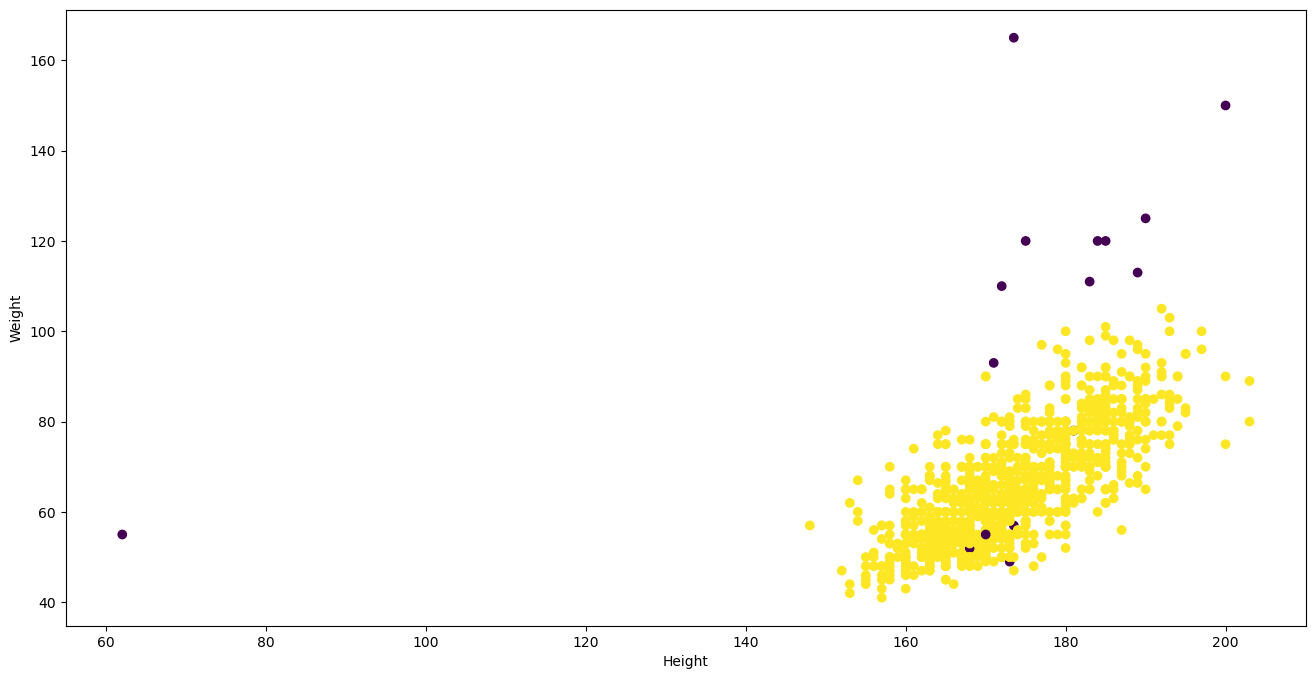

In [217]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tmpdf['Height'], tmpdf['Weight'], c=tmpdf['dbscan_cluster'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()